In [1]:
from sentinel_tiles import sentinel_tiles
from global_forecasting_system import forecast_Ta_C

In [2]:
geometry = sentinel_tiles.grid("11SPS")
geometry

{
  "dimensions": {
    "rows": 3660,
    "cols": 3660
  },
  "bbox": {
    "xmin": 600000.0,
    "ymin": 3590220.0,
    "xmax": 709800.0,
    "ymax": 3700020.0
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 30.0,
    "cell_height": -30.0
  }
}

[2025-05-29 18:27:57 INFO] before URL: https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202505/20250527/gfs_4_20250527_1200_036.grb2
[2025-05-29 18:27:57 INFO] downloading URL: https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202505/20250527/gfs_4_20250527_1200_036.grb2
[2025-05-29 18:27:57 INFO] wget -c -O "/Users/gregoryhalverson/data/GFS/2025-05-27/gfs_4_20250527_1200_036.grb2.download" "https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202505/20250527/gfs_4_20250527_1200_036.grb2"


--2025-05-29 18:27:57--  https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202505/20250527/gfs_4_20250527_1200_036.grb2
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 2610:20:8040:2::172, 2610:20:8040:2::178, 2610:20:8040:2::168, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|2610:20:8040:2::172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162619463 (155M)
Saving to: ‘/Users/gregoryhalverson/data/GFS/2025-05-27/gfs_4_20250527_1200_036.grb2.download’

     0K .......... .......... .......... .......... ..........  0%  230K 11m30s
    50K .......... .......... .......... .......... ..........  0%  593K 7m59s
   100K .......... .......... .......... .......... ..........  0% 1.98M 5m45s
   150K .......... .......... .......... .......... ..........  0% 4.66M 4m27s
   200K .......... .......... .......... .......... ..........  0%  539K 4m33s
   250K .......... .......... .......... .......... ..........  0% 

[2025-05-29 18:28:07 INFO] downloaded file: /Users/gregoryhalverson/data/GFS/2025-05-27/gfs_4_20250527_1200_036.grb2


........ .......... .......... .......... .......... 99% 28.2M 0s
157400K .......... .......... .......... .......... .......... 99% 40.0M 0s
157450K .......... .......... .......... .......... .......... 99% 76.7M 0s
157500K .......... .......... .......... .......... .......... 99% 76.2M 0s
157550K .......... .......... .......... .......... .......... 99% 64.8M 0s
157600K .......... .......... .......... .......... .......... 99% 28.3M 0s
157650K .......... .......... .......... .......... .......... 99% 80.3M 0s
157700K .......... .......... .......... .......... .......... 99% 23.9M 0s
157750K .......... .......... .......... .......... .......... 99% 73.1M 0s
157800K .......... .......... .......... .......... .......... 99% 7.80M 0s
157850K .......... .......... .......... .......... .......... 99% 1.75M 0s
157900K .......... .......... .......... .......... .......... 99% 31.6M 0s
157950K .......... .......... .......... .......... .......... 99% 82.8M 0s
158000K .......... ...

[2025-05-29 18:28:08 INFO] file already downloaded: /Users/gregoryhalverson/data/GFS/2025-05-27/gfs_4_20250527_1200_036.grb2
[2025-05-29 18:28:09 INFO] after URL: https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202505/20250527/gfs_4_20250527_1200_039.grb2
[2025-05-29 18:28:09 INFO] downloading URL: https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202505/20250527/gfs_4_20250527_1200_039.grb2
[2025-05-29 18:28:09 INFO] wget -c -O "/Users/gregoryhalverson/data/GFS/2025-05-27/gfs_4_20250527_1200_039.grb2.download" "https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202505/20250527/gfs_4_20250527_1200_039.grb2"


--2025-05-29 18:28:09--  https://www.ncei.noaa.gov/data/global-forecast-system/access/grid-004-0.5-degree/forecast/202505/20250527/gfs_4_20250527_1200_039.grb2
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 2610:20:8040:2::178, 2610:20:8040:2::168, 2610:20:8040:2::177, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|2610:20:8040:2::178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162070851 (155M)
Saving to: ‘/Users/gregoryhalverson/data/GFS/2025-05-27/gfs_4_20250527_1200_039.grb2.download’

     0K .......... .......... .......... .......... ..........  0%  216K 12m13s
    50K .......... .......... .......... .......... ..........  0%  455K 9m0s
   100K .......... .......... .......... .......... ..........  0% 60.1M 6m1s
   150K .......... .......... .......... .......... ..........  0% 3.01M 4m43s
   200K .......... .......... .......... .......... ..........  0%  539K 4m45s
   250K .......... .......... .......... .......... ..........  0% 66

[2025-05-29 18:28:20 INFO] downloaded file: /Users/gregoryhalverson/data/GFS/2025-05-27/gfs_4_20250527_1200_039.grb2


 .......... .......... .......... .......... 98% 22.7M 0s
156100K .......... .......... .......... .......... .......... 98% 54.7M 0s
156150K .......... .......... .......... .......... .......... 98% 27.5M 0s
156200K .......... .......... .......... .......... .......... 98% 41.4M 0s
156250K .......... .......... .......... .......... .......... 98% 77.9M 0s
156300K .......... .......... .......... .......... .......... 98% 39.2M 0s
156350K .......... .......... .......... .......... .......... 98% 67.4M 0s
156400K .......... .......... .......... .......... .......... 98% 6.18M 0s
156450K .......... .......... .......... .......... .......... 98% 13.0M 0s
156500K .......... .......... .......... .......... .......... 98%  116M 0s
156550K .......... .......... .......... .......... .......... 98% 99.6M 0s
156600K .......... .......... .......... .......... .......... 98% 40.1M 0s
156650K .......... .......... .......... .......... .......... 99% 31.2M 0s
156700K .......... .......... 

[2025-05-29 18:28:21 INFO] file already downloaded: /Users/gregoryhalverson/data/GFS/2025-05-27/gfs_4_20250527_1200_039.grb2


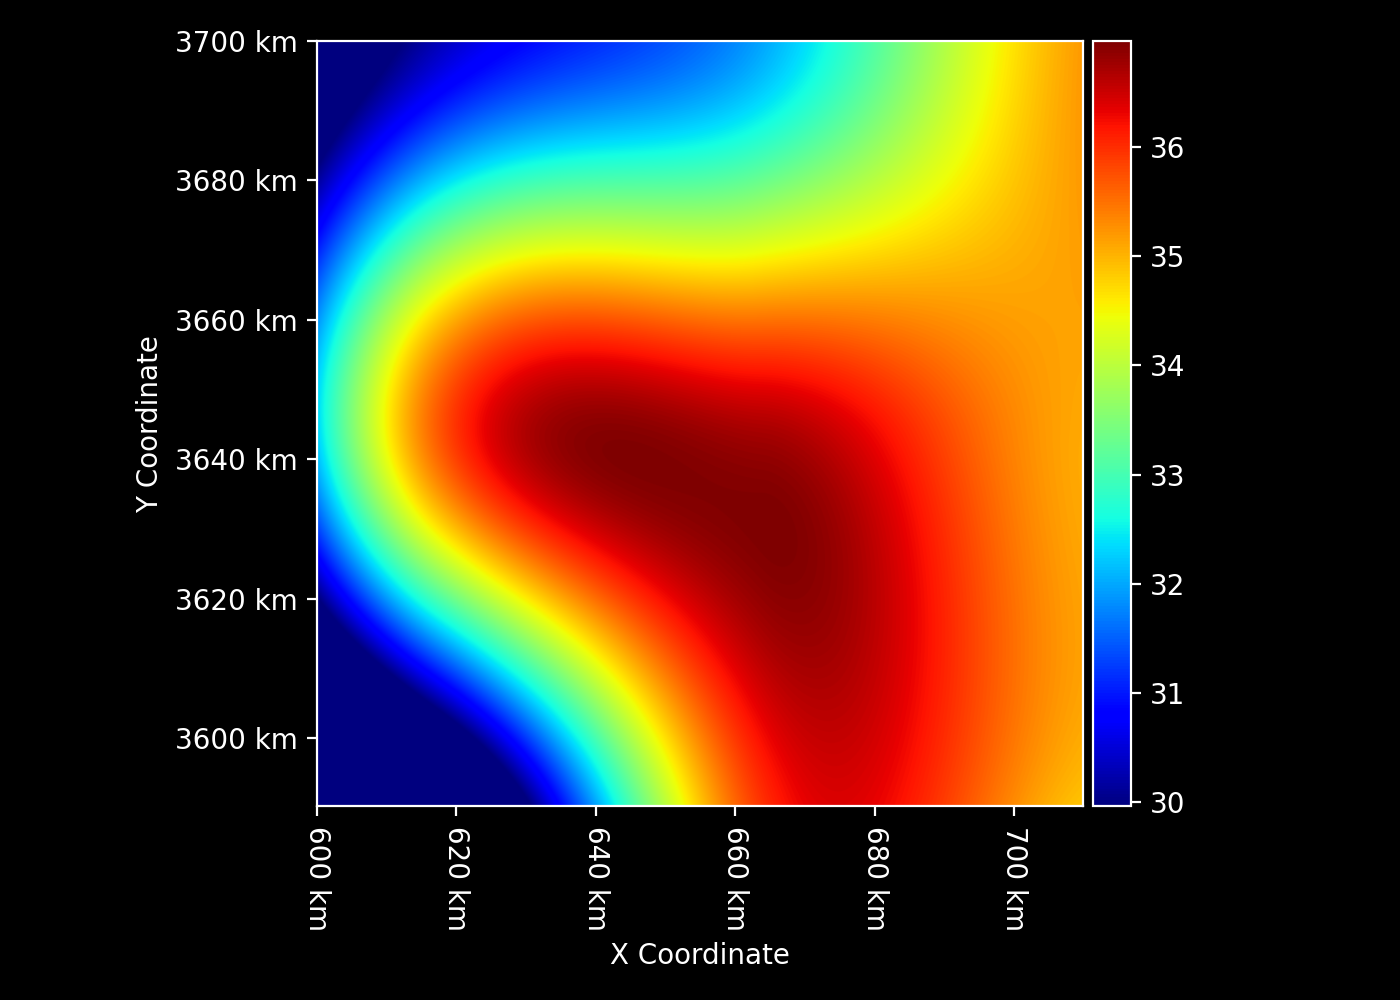

In [3]:
Ta_C = forecast_Ta_C(
    time_UTC="2025-05-29 00:00:00",
    geometry=geometry,
)

Ta_C